# 导入模型产生掩码图

In [1]:
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv
import numpy as np

np.set_printoptions(threshold=np.inf)

confing_file = 'fcn_hr18s_voc.py'
checkpoints_file = 'work_dirs/fcn_hr18s_voc_aug/iter_20000.pth'

model = init_segmentor(confing_file, checkpoints_file, device='cuda:0')


d:\ANACONDA\anaconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")
h:\Frame\mmsegmentation-master\mmseg\models\losses\cross_entropy_loss.py:232: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/fcn_hr18s_voc_aug/iter_20000.pth


In [1]:
s = 'output241'
img = 'work_dirs/fcn_hr18s_voc_aug/lane/{}.jpg'.format(s)
result = inference_segmentor(model, img)

model.show_result(img, result, show=True, out_file='work_dirs/fcn_hr18s_voc_aug/lane/lane_{}.jpg'.format(s))
print('成功')

d:\ANACONDA\anaconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")
h:\Frame\mmsegmentation-master\mmseg\models\losses\cross_entropy_loss.py:232: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/fcn_hr18s_voc/pth_12f/iter_20000.pth
成功


In [7]:
s = 'test3'
img = 'work_dirs/fcn_hr18s_voc/{}.jpg'.format(s)
result = inference_segmentor(model, img)

model.show_result(img, result, show=True, out_file='work_dirs/fcn_hr18s_voc/lane{}.jpg'.format(s))
print('成功')

成功


In [4]:
f = open("work_dirs/fcn_hr18s_voc/k.txt", "w")
strl = ','.join(str(i) for i in result)
f.writelines(strl)
f.close()
print('成功')

成功


In [7]:
print(result[0][1000])
print(result[0][1000][320])
print(len(result[0]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
print(len(result[0]))
print(len(result[0][0]))

1080
1920


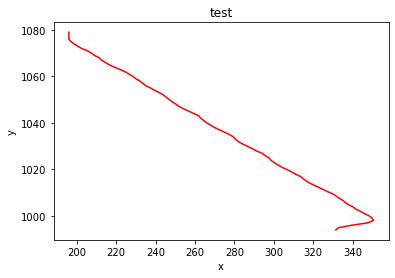

In [72]:
y1 = []
x1 = []
for y in range(1080):
    a = 0
    i = 0
    for x in range(1920):
        if result[0][y][x] == 1:
            #x1.append(x)
            #print(y,x)
            a+=x
            i+=1
    if a != 0:
        #print(y,int(a/i))
        y1.append(y)
        x1.append(a/i)
plt.plot(x1, y1, "red")
 
plt.title("test")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
import cv2
import numpy as np


def calculate_slope(line):
    """
    计算线段line的斜率
    :param line: np.array([[x_1, y_1, x_2, y_2]])
    :return:
    """
    x_1, y_1, x_2, y_2 = line[0]
    return (y_2 - y_1) / (x_2 - x_1)


def reject_abnormal_lines(lines, threshold):
    """
    剔除斜率不一致的线段
    :param lines: 线段集合, [np.array([[x_1, y_1, x_2, y_2]]),np.array([[x_1, y_1, x_2, y_2]]),...,np.array([[x_1, y_1, x_2, y_2]])]
    """
    slopes = [calculate_slope(line) for line in lines]
    while len(lines) > 0:
        mean = np.mean(slopes)
        diff = [abs(s - mean) for s in slopes]
        idx = np.argmax(diff)
        if diff[idx] > threshold:
            slopes.pop(idx)
            lines.pop(idx)
        else:
            break
    return lines


def least_squares_fit(lines):
    """
    将lines中的线段拟合成一条线段
    :param lines: 线段集合, [np.array([[x_1, y_1, x_2, y_2]]),np.array([[x_1, y_1, x_2, y_2]]),...,np.array([[x_1, y_1, x_2, y_2]])]
    :return: 线段上的两点,np.array([[xmin, ymin], [xmax, ymax]])
    """
    # 1. 取出所有坐标点
    x_coords = np.ravel([[line[0][0], line[0][2]] for line in lines])
    y_coords = np.ravel([[line[0][1], line[0][3]] for line in lines])
    # 2. 进行直线拟合.得到多项式系数
    poly = np.polyfit(x_coords, y_coords, deg=1)
    # 3. 根据多项式系数,计算两个直线上的点,用于唯一确定这条直线
    point_min = (np.min(x_coords), np.polyval(poly, np.min(x_coords)))
    point_max = (np.max(x_coords), np.polyval(poly, np.max(x_coords)))
    return np.array([point_min, point_max], dtype=np.int64)





In [34]:

#for i in range(0, 10):

img_name = 'work_dirs/fcn_hr18s_voc/lane201.jpg'
edge_img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
# 获取所有线段
lines = cv2.HoughLinesP(edge_img, 1, np.pi / 180, 15, minLineLength=40, maxLineGap=20)
# 按照斜率分成车道线

left_lines = [line for line in lines if calculate_slope(line) > 0]
right_lines = [line for line in lines if calculate_slope(line) < 0]
left_lines = reject_abnormal_lines(left_lines, threshold=0.2)
right_lines = reject_abnormal_lines(right_lines, threshold=0.2)

print("left lane")
# if least_squares_fit(left_lines) != '':
print(least_squares_fit(left_lines))
print("right lane")
# if least_squares_fit(right_lines) != '':
print(least_squares_fit(right_lines))

left lane
[[1361 -153]
 [1919  259]]
right lane
[[   0  598]
 [1919  447]]


In [35]:
type(edge_img)


numpy.ndarray

In [38]:
type(np.array(result))

numpy.ndarray

In [40]:
resultnp = np.array(result)
print(resultnp)

[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
 
#直线方程函数
def f_1(x, A, B):
    return A*x + B
 
#二次曲线方程
def f_2(x, A, B, C):
    return A*x*x + B*x + C
 
#三次曲线方程
def f_3(x, A, B, C, D):
    return A*x*x*x + B*x*x + C*x + D
 
def plot_test():
 
    plt.figure()
 
    #拟合点
    x0 = [1, 2, 3, 4, 5]
    y0 = [1, 3, 8, 18, 36]
 
    #绘制散点
    plt.scatter(x0[:], y0[:], 25, "red")
 
    #直线拟合与绘制
    A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
    x1 = np.arange(0, 6, 0.01)
    y1 = A1*x1 + B1
    plt.plot(x1, y1, "blue")
 
    #二次曲线拟合与绘制
    A2, B2, C2 = optimize.curve_fit(f_2, x0, y0)[0]
    x2 = np.arange(0, 6, 0.01)
    y2 = A2*x2*x2 + B2*x2 + C2 
    plt.plot(x2, y2, "green")
 
    #三次曲线拟合与绘制
    A3, B3, C3, D3= optimize.curve_fit(f_3, x0, y0)[0]
    x3 = np.arange(0, 6, 0.01)
    y3 = A3*x3*x3*x3 + B3*x3*x3 + C3*x3 + D3 
    plt.plot(x3, y3, "purple")
 
    plt.title("test")
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()
 
    return

In [162]:
f = open("work_dirs/fcn_hr18s_voc/result/0001.txt", "a")

In [167]:
def generate_result(result,file):
    flag1 = ['0','1']
    flag2 = ['0','1']
    p1=p2=p3=p4=0
    for i in range(3,0,-1):
        y0 = []
        x0 = []
        num = 0
        for y in range(810,1080):
            a = 0
            count = 0
            for x in range(1920):
                if result[0][y][x] == i:
                    a+=x
                    count+=1
            if a != 0:
                y0.append(y)
                x0.append(a/count)
                num += count

        

        #直线拟合与绘制
        if num > 100: 
            if flag1[0] == '0' or i == 2:
                A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
                y1 = np.arange(810, 1080, 1)
                x1 = (y1 - B1)/A1
                # plt.plot(x0, y0, "red")
                # plt.plot(x1, y1, "blue")

                # plt.title("test")
                # plt.xlabel('x')
                # plt.ylabel('y')
                # plt.show()

                if A1 < 0 :
                    p1 = int((810 - B1)/A1)
                    p3 = int((1080 - B1)/A1)
                    if i==3:
                        flag1[0] = '1'
                        flag2[0] = '0'
                        print("白实线")
                    elif i==2:
                        flag1[0] = '1'
                        flag2[0] = '1'
                        print("黄实线")
                    elif i==1:
                        flag1[0] = '0'
                        flag2[0] = '0'
                        print("白虚线")
                    # print("left")
                    # print('p1({},810)'.format(p1))
                    # print('p3({},1080)'.format(p3))
                else:
                    p2 = int((810 - B1)/A1)
                    p4 = int((1080 - B1)/A1)
                    if i==3:
                        flag1[1] = '1'
                        flag2[1] = '0'
                        print("白实线")
                    elif i==2:
                        flag1[1] = '1'
                        flag2[1] = '1'
                        print("黄实线")
                    elif i==1:
                        flag1[1] = '0'
                        flag2[1] = '0'
                        print("白虚线")
                    # print("right")
                    # print('p1({},810)'.format(p2))
                    # print('p3({},1080)'.format(p4))
    if p1 == p2 == 0:
        p1 = p3
        p2 = p4
    print(flag1[0]+flag1[1])
    print(flag2[0]+flag2[1])
    print('{},810'.format(p1))
    print('{},1080'.format(p3))
    print('{},810'.format(p2))
    print('{},1080'.format(p4))
    file.write(flag1[0]+flag1[1]+'\n')
    file.write(flag2[0]+flag2[1]+'\n')
    file.write(str(p1)+' 810\n')
    file.write(str(p2)+' 810\n')
    file.write(str(p3)+' 1080\n')
    file.write(str(p4)+' 1080\n')
    file.close()

In [164]:
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv
import numpy as np

np.set_printoptions(threshold=np.inf)


confing_file = 'fcn_hr18s_voc.py'
checkpoints_file = 'work_dirs/fcn_hr18s_voc/pth_12f/iter_20000.pth'

model = init_segmentor(confing_file, checkpoints_file, device='cuda:0')

img = 'work_dirs/fcn_hr18s_voc/output201.jpg'
result = inference_segmentor(model, img)

h:\Frame\mmsegmentation-master\mmseg\models\losses\cross_entropy_loss.py:232: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/fcn_hr18s_voc/pth_12f/iter_20000.pth


In [ ]:
img = 'work_dirs/fcn_hr18s_voc/output201.jpg'
result = inference_segmentor(model, img)

In [168]:
for i in range(10):
    img = 'data/output_dir/JPEGImages/output{}.jpg'.format(i+1)
    result = inference_segmentor(model, img)
    file = open('work_dirs/fcn_hr18s_voc/result/{0:04d}.txt'.format(i), "a")
    generate_result(result,file)

黄实线
白虚线
01
01
737,810
91,1080
1494,810
2230,1080
黄实线
白虚线
01
01
734,810
87,1080
1494,810
2231,1080
黄实线
白虚线
01
01
734,810
84,1080
1496,810
2224,1080
黄实线
白虚线
01
01
734,810
82,1080
1495,810
2228,1080
黄实线
白虚线
01
01
735,810
82,1080
1494,810
2229,1080
黄实线
白虚线
01
01
734,810
82,1080
1495,810
2228,1080
黄实线
白虚线
01
01
735,810
82,1080
1495,810
2227,1080
黄实线
白虚线
01
01
734,810
82,1080
1495,810
2227,1080
黄实线
白虚线
01
01
738,810
86,1080
1487,810
2215,1080
黄实线
白虚线
01
01
705,810
55,1080
1388,810
2088,1080


# 生成result完整代码

### 第一版(没有考虑双黄线)

In [29]:
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# np.set_printoptions(threshold=np.inf)

# 直线方程函数
def f_1(x, A, B):
    return A*x + B

# 产生结果
def generate_result(result,file):
    flag = 0
    flag1 = ['0','1']
    flag2 = ['0','1']
    p1=p2=p3=p4=0
    for i in range(3,0,-1):
        y0 = []
        x0 = []
        num = 0
        for y in range(810,1080):#从810开始扫描
            a = 0
            count = 0           #记录像素个数
            for x in range(1920):
                if result[0][y][x] == i:
                    a+=x
                    count+=1
            if a != 0:
                if count > 105:
                    flag += 1
                y0.append(y)
                x0.append(a/count)#求x的均值
                num += count

        

        #直线拟合与绘制
        if num > 100: 
            if flag1[0] == '0' or i == 2:
                A1, B1 = optimize.curve_fit(f_1, x0, y0)[0] #拟合直线
                y1 = np.arange(810, 1080, 1)
                x1 = (y1 - B1)/A1

                if A1 < 0 :
                    p1 = int((810 - B1)/A1)
                    p3 = int((1080 - B1)/A1)
                    if i==3:
                        flag1[0] = '1'
                        flag2[0] = '0'

                    elif i==2:
                        flag1[0] = '1'
                        flag2[0] = '1'
                        if flag > 5:
                            flag1[0] = '2'  
 
                    elif i==1:
                        flag1[0] = '0'
                        flag2[0] = '0'

                else:
                    p2 = int((810 - B1)/A1)
                    p4 = int((1080 - B1)/A1)
                    if i==3:
                        flag1[1] = '1'
                        flag2[1] = '0'

                    elif i==2:
                        flag1[1] = '1'
                        flag2[1] = '1'

                    elif i==1:
                        flag1[1] = '0'
                        flag2[1] = '0'



    file.write(flag1[0]+flag1[1]+'\n')
    file.write(flag2[0]+flag2[1]+'\n')
    file.write(str(p1)+' 810\n')
    file.write(str(p2)+' 810\n')
    file.write(str(p3)+' 1080\n')
    file.write(str(p4)+' 1080\n')
    file.close()

if __name__ == '__main__':
    confing_file = 'fcn_hr18s_voc.py' # 配置文件
    checkpoints_file = 'work_dirs/fcn_hr18s_voc_aug/iter_20000.pth'
    img_file = 'data/test/' # 原始图片存放位置
    img_list = os.listdir(img_file)
    txt_file = 'work_dirs/fcn_hr18s_voc_aug/result2/' #txt结果存放位置
    model = init_segmentor(confing_file, checkpoints_file, device='cuda:0')
    img_number = 120 # 图片数量
    for i in range(100,img_number+1):
        img = img_file + 'output{}.jpg'.format(i)
        result = inference_segmentor(model, img)
        file = open(txt_file + '{}.txt'.format(i*10), "a")
        generate_result(result,file)
        print('{}.txt'.format(i*10))

load checkpoint from local path: work_dirs/fcn_hr18s_voc_aug/iter_20000.pth
100.txt
101.txt
102.txt
103.txt
104.txt
105.txt
106.txt
107.txt
108.txt
109.txt
110.txt
111.txt
112.txt
113.txt
114.txt
115.txt
116.txt
117.txt
118.txt
119.txt
120.txt


### 第二版

In [2]:
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import os
# np.set_printoptions(threshold=np.inf)

# 直线方程函数
def f_1(x, A, B):
    return A*x + B

# 产生结果
def generate_result(result,file):
    flag = 0
    flag1 = ['0','0']
    flag2 = ['0','0']
    p1=p2=p3=p4=0
    for i in range(3,0,-1):
        y0 = []
        x0 = []
        num = 0
        for y in range(810,1080): #从810开始扫描 
            a = 0
            count = 0             #记录掩码个数
            for x in range(1920):
                if result[0][y][x] == i:
                    a+=x
                    count+=1
            if a != 0:
                if count > 105:
                    flag += 1
                y0.append(y)
                x0.append(a/count)#求x坐标的均值
                num += count    #掩码总个数

        

        #直线拟合与绘制
        if num > 1000: 
            if flag1[0] == '0' or i == 2:
                A1, B1 = optimize.curve_fit(f_1, x0, y0)[0] #拟合直线A1为斜率


                if A1 < 0 : #左车道线
                    p1 = int((810 - B1)/A1)       #求交点
                    p3 = int((1080 - B1)/A1)
                    if i==3:    #白实线
                        flag1[0] = '1'
                        flag2[0] = '0' 

                    elif i==2:  #黄线
                        flag1[0] = '1'
                        flag2[0] = '1'
                        if flag > 5:  #黄线中包含双实线
                            flag1[0] = '2'   
    
                    elif i==1:  #白虚线
                        flag1[0] = '0'
                        flag2[0] = '0'

                else: #右车道线
                    p2 = int((810 - B1)/A1)
                    p4 = int((1080 - B1)/A1)
                    if i==3:
                        flag1[1] = '1'
                        flag2[1] = '0'

                    elif i==2:
                        flag1[1] = '1'
                        flag2[1] = '1'
                        if flag > 5:  #黄线中包含双实线
                            flag2[0] = '2'

                    elif i==1:
                        flag1[1] = '0'
                        flag2[1] = '0'


    file.write('\n' + flag1[0]+flag1[1]+'\n')
    file.write(flag2[0]+flag2[1]+'\n')
    file.write(str(p1)+' 810\n')
    file.write(str(p2)+' 810\n')
    file.write(str(p3)+' 1080\n')
    file.write(str(p4)+' 1080\n')
    file.close()

if __name__ == '__main__':
    confing_file = 'fcn_hr18s_voc.py' # 配置文件
    checkpoints_file = 'work_dirs/fcn_hr18s_voc_aug/iter_20000.pth'#模型
    img_file = 'data/test/' # 原始图片存放位置
    img_list = os.listdir(img_file)
    txt_file = 'work_dirs/fcn_hr18s_voc_aug/result1/' #txt结果存放位置
    model = init_segmentor(confing_file, checkpoints_file, device='cuda:0')#加载模型

    for img in img_list:
        name = img.split('.')
        img_type = name[1] # 得到图片类型、
        if img_type == 'jpg' or img_type == 'png':
            result = inference_segmentor(model, img_file + img) # 检测图片获得掩码图
            i = int(name[0].split('t')[2]) # 得到图片下标 
            file = open(txt_file + '{}.txt'.format(i*10), "a") # 原图片是以10帧分割的
            generate_result(result,file) # 产生结果
            print('{}.txt'.format(i*10))


h:\Frame\mmsegmentation-master\mmseg\models\losses\cross_entropy_loss.py:232: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/fcn_hr18s_voc_aug/iter_20000.pth
10.txt
100.txt
1000.txt
1010.txt
1020.txt
1030.txt
1040.txt
1050.txt
1060.txt
1070.txt
1080.txt
1090.txt
110.txt
1100.txt
1110.txt
1120.txt
1130.txt
1140.txt
1150.txt
1160.txt
1170.txt
1180.txt
1190.txt
120.txt
1200.txt
130.txt
140.txt
150.txt
160.txt
170.txt
180.txt
190.txt
20.txt
200.txt
210.txt
220.txt
230.txt
240.txt
250.txt
260.txt
270.txt
280.txt
290.txt
30.txt
300.txt
310.txt
320.txt
330.txt
340.txt
350.txt
360.txt
370.txt
380.txt
390.txt
40.txt
400.txt
410.txt
420.txt
430.txt
440.txt
450.txt
460.txt
470.txt
480.txt
490.txt
50.txt
500.txt
510.txt
520.txt
530.txt
540.txt
550.txt
560.txt
570.txt
580.txt
590.txt
60.txt
600.txt
610.txt


KeyboardInterrupt: 

# 数据增强

## 图片翻转

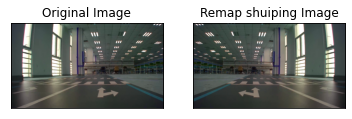

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
import copy

#python 图像翻转,自定义翻转

img = cv2.imread('work_dirs/fcn_hr18s_voc/output120.jpg') #原图像
        
#python 图像翻转,使用openCV flip()方法翻转
fimg = cv.flip(img,1,dst=None) #水平镜像
cv.imwrite('work_dirs/fcn_hr18s_voc//f120.jpg',fimg)
plt.subplot(221),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(xImg)
plt.title('Remap shuiping Image'), plt.xticks([]), plt.yticks([])


plt.show()



In [ ]:
from PIL import Image
import os
import os.path

rootdir  =  r'data\JPEGImages'  # 指明被遍历的文件夹
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        print ( 'parent is :' + parent)
        print ( 'filename is :' + filename)
        currentPath = os.path.join(parent, filename)
        print ( 'the fulll name of the file is :' + currentPath)

        im = Image.open (currentPath)
        out = im.transpose(Image.FLIP_LEFT_RIGHT)
        newname = r'work_dirs\fcn_hr18s_voc\img_flip\{}_flip.jpg'.format(filename.split('.')[0])
        out.save(newname)
# im = Image.open(r'work_dirs\fcn_hr18s_voc\test\test4.jpg')
# out = im.transpose(Image.FLIP_LEFT_RIGHT)
# out.save(r'work_dirs\fcn_hr18s_voc\test\test4_flip.jpg')

## 批量改名

In [1]:
import os
folder_path = r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc\result0'
file_list = os.listdir(folder_path)
# 切换到当前文件夹路径下
os.chdir(folder_path)   
for old_name in file_list:
    old = old_name.split('.') 
    #new_name = '{0:04d}'.format(int(old[0])*10) + '.' + old[1]
    new_name = str((int(old[0])+1)*10) + '.' + old[1]
    #os.rename(old_name, 'H:/Frame/mmsegmentation-master/work_dirs/fcn_hr18s_voc/result3/' + new_name)
    os.rename(old_name,new_name)
    pass

In [2]:
import os
# 获取指定目录下的所有子目录和文件名 
path = os.listdir(r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc')  
# 对文件或目录改名
os.rename(r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc\0000.txt',r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc\1.txt')
# 切换到当前目录下
os.chdir(r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc')

In [5]:
print(int('0011'))

11


## 图像增强
 包括:
    1. 改变亮度
    2. 加噪声
    3. 加随机点
    4. 镜像(需要改变points)

In [1]:


import time
import random
import cv2
import os
import numpy as np
from skimage.util import random_noise
import base64
import json
import re
from copy import deepcopy
import argparse


# 图像均为cv2读取
class DataAugmentForObjectDetection():
    def __init__(self, change_light_rate=0.5,
                 add_noise_rate=0.5, random_point=0.5, flip_rate=0.5, shift_rate=0.5, rand_point_percent=0.03,
                 is_addNoise=True, is_changeLight=True, is_random_point=True, is_shift_pic_bboxes=True,
                 is_filp_pic_bboxes=True):
        # 配置各个操作的属性
        self.change_light_rate = change_light_rate
        self.add_noise_rate = add_noise_rate
        self.random_point = random_point
        self.flip_rate = flip_rate
        self.shift_rate = shift_rate

        self.rand_point_percent = rand_point_percent

        # 是否使用某种增强方式
        self.is_addNoise = is_addNoise
        self.is_changeLight = is_changeLight
        self.is_random_point = is_random_point
        self.is_filp_pic_bboxes = is_filp_pic_bboxes
        self.is_shift_pic_bboxes = is_shift_pic_bboxes

    # 加噪声
    def _addNoise(self, img):
        return random_noise(img, seed=int(time.time())) * 255

    # 调整亮度
    def _changeLight(self, img):
        alpha = random.uniform(0.35, 1)
        blank = np.zeros(img.shape, img.dtype)
        return cv2.addWeighted(img, alpha, blank, 1 - alpha, 0)

    # 随机的改变点的值
    def _addRandPoint(self, img):
        percent = self.rand_point_percent
        num = int(percent * img.shape[0] * img.shape[1])
        for i in range(num):
            rand_x = random.randint(0, img.shape[0] - 1)
            rand_y = random.randint(0, img.shape[1] - 1)
            if random.randint(0, 1) == 0:
                img[rand_x, rand_y] = 0
            else:
                img[rand_x, rand_y] = 255
        return img

    # 平移
    def _shift_pic_bboxes(self, img, json_info):

        # ---------------------- 平移图像 ----------------------
        h, w, _ = img.shape
        x_min = w
        x_max = 0
        y_min = h
        y_max = 0

        shapes = json_info['shapes']
        for shape in shapes:
            points = np.array(shape['points'])
            x_min = min(x_min, points[:, 0].min())
            y_min = min(y_min, points[:, 1].min())
            x_max = max(x_max, points[:, 0].max())
            y_max = max(y_max, points[:, 0].max())

        d_to_left = x_min  # 包含所有目标框的最大左移动距离
        d_to_right = w - x_max  # 包含所有目标框的最大右移动距离
        d_to_top = y_min  # 包含所有目标框的最大上移动距离
        d_to_bottom = h - y_max  # 包含所有目标框的最大下移动距离

        x = random.uniform(-(d_to_left - 1) / 3, (d_to_right - 1) / 3)
        y = random.uniform(-(d_to_top - 1) / 3, (d_to_bottom - 1) / 3)

        M = np.float32([[1, 0, x], [0, 1, y]])  # x为向左或右移动的像素值,正为向右负为向左; y为向上或者向下移动的像素值,正为向下负为向上
        shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

        # ---------------------- 平移boundingbox ----------------------
        for shape in shapes:
            for p in shape['points']:
                p[0] += x
                p[1] += y
        return shift_img, json_info

    # 镜像
    def _filp_pic_bboxes(self, img, json_info):

        # ---------------------- 翻转图像 ----------------------
        h, w, _ = img.shape

        sed = random.random()

        if 0 < sed < 0.33:  # 0.33的概率水平翻转，0.33的概率垂直翻转,0.33是对角反转
            flip_img = cv2.flip(img, 0)  # _flip_x
            inver = 0
        elif 0.33 < sed < 0.66:
            flip_img = cv2.flip(img, 1)  # _flip_y
            inver = 1
        else:
            flip_img = cv2.flip(img, -1)  # flip_x_y
            inver = -1

        # ---------------------- 调整boundingbox ----------------------
        shapes = json_info['shapes']
        for shape in shapes:
            for p in shape['points']:
                if inver == 0:
                    p[1] = h - p[1]
                elif inver == 1:
                    p[0] = w - p[0]
                elif inver == -1:
                    p[0] = w - p[0]
                    p[1] = h - p[1]

        return flip_img, json_info

    # 图像增强方法
    def dataAugment(self, img, dic_info):

        change_num = 0  # 改变的次数
        while change_num < 1:  # 默认至少有一种数据增强生效

            if self.is_changeLight:
                if random.random() > self.change_light_rate:  # 改变亮度
                    change_num += 1
                    img = self._changeLight(img)

            if self.is_addNoise:
                if random.random() < self.add_noise_rate:  # 加噪声
                    change_num += 1
                    img = self._addNoise(img)
            if self.is_random_point:
                if random.random() < self.random_point:  # 加随机点
                    change_num += 1
                    img = self._addRandPoint(img)
            # if self.is_shift_pic_bboxes:
            #     if random.random() < self.shift_rate:  # 平移
            #         change_num += 1
            #         img, dic_info = self._shift_pic_bboxes(img, dic_info)
            if self.is_filp_pic_bboxes or 1:
                if random.random() < self.flip_rate:  # 翻转
                    change_num += 1
                    img, bboxes = self._filp_pic_bboxes(img, dic_info)

        return img, dic_info


# xml解析工具
class ToolHelper():
    # 从json文件中提取原始标定的信息
    def parse_json(self, path):
        with open(path)as f:
            json_data = json.load(f)
        return json_data

    # 对图片进行字符编码
    def img2str(self, img_name):
        with open(img_name, "rb")as f:
            base64_data = str(base64.b64encode(f.read()))
        match_pattern = re.compile(r'b\'(.*)\'')
        base64_data = match_pattern.match(base64_data).group(1)
        return base64_data

    # 保存图片结果
    def save_img(self, save_path, img):
        cv2.imwrite(save_path, img)

    # 保持json结果

    def save_json(self, file_name, save_folder, dic_info):
        with open(os.path.join(save_folder, file_name), 'w') as f:
            json.dump(dic_info, f, indent=2)


if __name__ == '__main__':

    need_aug_num = 1  # 每张图片需要增强的次数

    toolhelper = ToolHelper()  # 工具

    is_endwidth_dot = True  # 文件是否以.jpg或者png结尾

    dataAug = DataAugmentForObjectDetection()  # 数据增强工具类

    # 获取相关参数
    parser = argparse.ArgumentParser()
    parser.add_argument('--source_img_json_path', type=str, default=r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc\test1')
    parser.add_argument('--save_img_json_path', type=str, default=r'H:\Frame\mmsegmentation-master\work_dirs\fcn_hr18s_voc\test_aug')
    args = parser.parse_args()
    source_img_json_path = args.source_img_json_path  # 图片和json文件原始位置
    save_img_json_path = args.save_img_json_path  # 图片增强结果保存文件

    # 如果保存文件夹不存在就创建
    if not os.path.exists(save_img_json_path):
        os.mkdir(save_img_json_path)

    for parent, _, files in os.walk(source_img_json_path):
        files.sort()  # 排序一下
        for file in files:
            if file.endswith('jpg') or file.endswith('png'):
                cnt = 0
                pic_path = os.path.join(parent, file)
                json_path = os.path.join(parent, file[:-4] + '.json')
                json_dic = toolhelper.parse_json(json_path)
                # 如果图片是有后缀的
                if is_endwidth_dot:
                    # 找到文件的最后名字
                    dot_index = file.rfind('.')
                    _file_prefix = file[:dot_index]  # 文件名的前缀
                    _file_suffix = file[dot_index:]  # 文件名的后缀
                img = cv2.imread(pic_path)

                while cnt < need_aug_num:  # 继续增强
                    auged_img, json_info = dataAug.dataAugment(deepcopy(img), deepcopy(json_dic))
                    img_name = '{}_{}{}'.format(_file_prefix, cnt + 1, _file_suffix)  # 图片保存的信息
                    img_save_path = os.path.join(save_img_json_path, img_name)
                    toolhelper.save_img(img_save_path, auged_img)  # 保存增强图片

                    json_info['imagePath'] = img_name
                    base64_data = toolhelper.img2str(img_save_path)
                    json_info['imageData'] = base64_data
                    toolhelper.save_json('{}_{}.json'.format(_file_prefix, cnt + 1),
                                         save_img_json_path, json_info)  # 保存xml文件
                    print(img_name)
                    cnt += 1  # 继续增强下一张

usage: ipykernel_launcher.py [-h]
                             [--source_img_json_path SOURCE_IMG_JSON_PATH]
                             [--save_img_json_path SAVE_IMG_JSON_PATH]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"da0c863a-2b83-410f-b498-7aa2b78e96b1" --shell=9002 --transport="tcp" --iopub=9004 --f=c:\Users\86187\AppData\Roaming\jupyter\runtime\kernel-5416xDa8G3m3dVqW.json


SystemExit: 2

d:\ANACONDA\anaconda3\envs\d2l\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 分配训练集、验证集、测试集数量

In [ ]:
import os
import random

trainval_percent = 1
train_percent = 0.9
xmlfilepath = 'JPEGImages'
txtsavepath = 'ImageSets\Main'
total_xml = os.listdir(xmlfilepath)

num = len(total_xml)
list = range(num)
tv = int(num * trainval_percent)
tr = int(tv * train_percent)
trainval = random.sample(list, tv)
train = random.sample(trainval, tr)

ftrainval = open('ImageSets/Main/trainval.txt', 'w')
ftest = open('ImageSets/Main/test.txt', 'w')
ftrain = open('ImageSets/Main/train.txt', 'w')
fval = open('ImageSets/Main/val.txt', 'w')

for i in list:
    name = total_xml[i][:-4] + '\n'
    if i in trainval:
        ftrainval.write(name)
        if i in train:
            ftrain.write(name)
        else:
            fval.write(name)
    else:
        ftest.write(name)

ftrainval.close()
ftrain.close()
fval.close()
ftest.close()

In [7]:
import os
import random

xmlfilepath = r'H:\Frame\mmsegmentation-master\data\dataset\aug'
txtsavepath = r'H:\Frame\mmsegmentation-master\data\output_dir\ImageSets'
total_xml = os.listdir(xmlfilepath)

num = len(total_xml)
list = range(num)

aug = open(txtsavepath + '\\aug.txt', 'w')


for i in list:
    if total_xml[i].split('.')[1] == 'jpg':
        name = total_xml[i][:-4] + '\n'
        aug.write(name)

aug.close()

# 测试视频

In [1]:
import cv2
import numpy as np
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv

# 定义保存图片函数
# image:要保存的图片名字
# addr；图片地址与相片名字的前部分
# num: 相片，名字的后缀。int 类型
def save_image(image, addr, num):
    address = 'H:/Frame/mmsegmentation-master/work_dirs/fcn_hr18s_voc/img/' + addr + str(num) + '.jpg'
    cv2.imwrite(address, image)


# 读取视频文件
videoCapture = cv2.VideoCapture(r'H:\Pytorch\venv\video\carvideo.mp4')
confing_file = 'fcn_hr18s_voc.py'
checkpoints_file = 'work_dirs/fcn_hr18s_voc_aug/iter_20000.pth'

model = init_segmentor(confing_file, checkpoints_file, device='cuda:0')

# 读帧
success, frame = videoCapture.read()
i = 0
timeF = 10
j = 0
while success and i < 10:
    if i % timeF == 0:
        j = j + 1
        result = inference_segmentor(model, frame)
        #save_image(frame, 'output', j)#保存原图
        model.show_result(frame, result, show=True, out_file='work_dirs/fcn_hr18s_voc_aug/lane/laneline{}.jpg'.format(i))
        print('save image:frame', i)
        i = i + 1

    success, frame = videoCapture.read()




print('成功')

d:\ANACONDA\anaconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")
h:\Frame\mmsegmentation-master\mmseg\models\losses\cross_entropy_loss.py:232: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/fcn_hr18s_voc_aug/iter_20000.pth
save image:frame 0


KeyboardInterrupt: 